In [1]:
!python libraries.py

2024-08-31 18:39:22,594 - INFO - Upgrading pip...
2024-08-31 18:39:22,594 - INFO - Running pip command: install --upgrade pip
2024-08-31 18:39:24,041 - INFO - Command 'install --upgrade pip' executed successfully.
2024-08-31 18:39:24,041 - INFO - pip upgraded successfully.
2024-08-31 18:39:24,041 - INFO - Installing library numpy...
2024-08-31 18:39:24,042 - INFO - Running pip command: install numpy
2024-08-31 18:39:25,218 - INFO - Command 'install numpy' executed successfully.
2024-08-31 18:39:25,218 - INFO - numpy installed successfully.
2024-08-31 18:39:25,218 - INFO - Installing library pandas...
2024-08-31 18:39:25,218 - INFO - Running pip command: install pandas
2024-08-31 18:39:26,455 - INFO - Command 'install pandas' executed successfully.
2024-08-31 18:39:26,455 - INFO - pandas installed successfully.
2024-08-31 18:39:26,455 - INFO - Installing library matplotlib...
2024-08-31 18:39:26,455 - INFO - Running pip command: install matplotlib
2024-08-31 18:39:27,724 - INFO - Comman

In [2]:
import tensorflow as tf
print(f'tf.config.list_physical_devices("GPU") = {tf.config.list_physical_devices("GPU")}')

tf.config.list_physical_devices("GPU") = []


In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13496443395777819613
xla_global_id: -1
]


In [4]:
import os
import numpy as np
import pandas as pd
import utils

In [5]:
import dataset

data = dataset.LGHG2(data_dir='./data')
X_train, X_val, X_test, y_train, y_val, y_test = data.get_dataset()

INFO:root:./data = ['.ipynb_checkpoints', 'test', 'train', 'val']
INFO:root:./data\train = ['.ipynb_checkpoints', 'TRAIN_LGHG2@n10degC_to_25degC_Norm_5Inputs.csv']
INFO:root:./data\val = ['01_TEST_LGHG2@n10degC_Norm_(05_Inputs).csv', '02_TEST_LGHG2@0degC_Norm_(05_Inputs).csv', '03_TEST_LGHG2@10degC_Norm_(05_Inputs).csv']
INFO:root:./data\test = ['.ipynb_checkpoints', '04_TEST_LGHG2@25degC_Norm_(05_Inputs).csv']
INFO:root:train_data_df loaded.
INFO:root:val_data_df loaded.
INFO:root:test_data_df loaded.
INFO:root:data_columns = Index(['V', 'I', 'Temp', 'V_avg', 'I_avg', 'SOC'], dtype='object')
INFO:root:features = ['V', 'I', 'Temp', 'V_avg', 'I_avg']
INFO:root:target = ['SOC']


In [6]:
train_data_df, val_data_df, test_data_df = data.get_dfs()

In [6]:
train_data_df

,V,I,Temp,V_avg,I_avg,SOC
0,0.385148,0.75102,0.303101,0.385148,0.75102,0.206417
1,0.385152,0.75102,0.304591,0.385150,0.75102,0.206417
2,0.385156,0.75102,0.306081,0.385152,0.75102,0.206417
3,0.385160,0.75102,0.307572,0.385154,0.75102,0.206417
4,0.385164,0.75102,0.309062,0.385156,0.75102,0.206417
...,...,...,...,...,...,...
669951,0.478843,0.75102,0.008477,0.459558,0.75102,0.283243
669952,0.478843,0.75102,0.008477,0.459699,0.75102,0.283243
669953,0.478843,0.75102,0.008477,0.459839,0.75102,0.283243
669954,0.478961,0.75102,0.008477,0.459979,0.75102,0.283243


In [7]:
train_data_df.isna().sum()

V        0
I        0
Temp     0
V_avg    0
I_avg    0
SOC      0
dtype: int64

In [8]:
train_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669956 entries, 0 to 669955
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V       669956 non-null  float64
 1   I       669956 non-null  float64
 2   Temp    669956 non-null  float64
 3   V_avg   669956 non-null  float64
 4   I_avg   669956 non-null  float64
 5   SOC     669956 non-null  float64
dtypes: float64(6)
memory usage: 30.7 MB


In [9]:
val_data_df

,V,I,Temp,V_avg,I_avg,SOC
0,0.967308,0.749218,0.005644,0.967308,0.749218,1.000000
1,0.957333,0.746992,0.005644,0.962321,0.748105,0.999990
2,0.953690,0.747098,0.005644,0.959444,0.747769,0.999983
3,0.952046,0.747098,0.005644,0.957594,0.747602,0.999973
4,0.951106,0.747098,0.005644,0.956297,0.747501,0.999963
...,...,...,...,...,...,...
126102,0.335128,0.751020,0.532568,0.329741,0.751020,0.194990
126103,0.335128,0.751020,0.532568,0.329778,0.751020,0.194990
126104,0.335128,0.751020,0.532568,0.329815,0.751020,0.194990
126105,0.335128,0.751020,0.532568,0.329851,0.751020,0.194990


In [10]:
val_data_df.isna().sum()

V        0
I        0
Temp     0
V_avg    0
I_avg    0
SOC      0
dtype: int64

In [11]:
val_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126107 entries, 0 to 126106
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V       126107 non-null  float64
 1   I       126107 non-null  float64
 2   Temp    126107 non-null  float64
 3   V_avg   126107 non-null  float64
 4   I_avg   126107 non-null  float64
 5   SOC     126107 non-null  float64
dtypes: float64(6)
memory usage: 5.8 MB


In [12]:
test_data_df

,V,I,Temp,V_avg,I_avg,SOC
0,0.966960,0.748900,0.920678,0.966960,0.748900,1.000000
1,0.966020,0.746992,0.920677,0.966490,0.747946,0.999990
2,0.965901,0.746992,0.917845,0.966294,0.747628,0.999983
3,0.965783,0.747098,0.917845,0.966166,0.747496,0.999973
4,0.965665,0.746992,0.917845,0.966066,0.747395,0.999963
...,...,...,...,...,...,...
47512,0.298614,0.751020,0.926344,0.292723,0.751020,0.136623
47513,0.298614,0.751020,0.926344,0.292761,0.751020,0.136623
47514,0.298614,0.751020,0.926344,0.292798,0.751020,0.136623
47515,0.298614,0.751020,0.929177,0.292834,0.751020,0.136623


In [13]:
test_data_df.isna().sum()

V        0
I        0
Temp     0
V_avg    0
I_avg    0
SOC      0
dtype: int64

In [14]:
test_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47517 entries, 0 to 47516
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V       47517 non-null  float64
 1   I       47517 non-null  float64
 2   Temp    47517 non-null  float64
 3   V_avg   47517 non-null  float64
 4   I_avg   47517 non-null  float64
 5   SOC     47517 non-null  float64
dtypes: float64(6)
memory usage: 2.2 MB


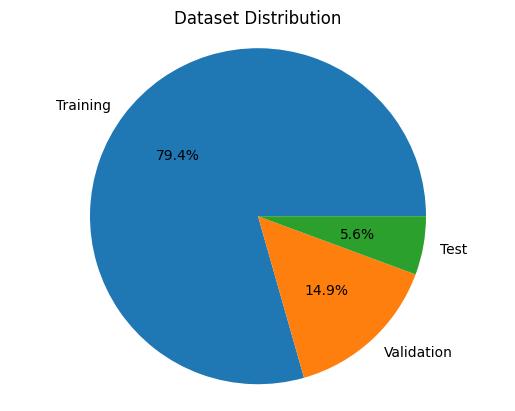

In [16]:
utils.pie_chart_plot(
    train_data_df=train_data_df, 
    val_data_df=val_data_df, 
    test_data_df=test_data_df
)

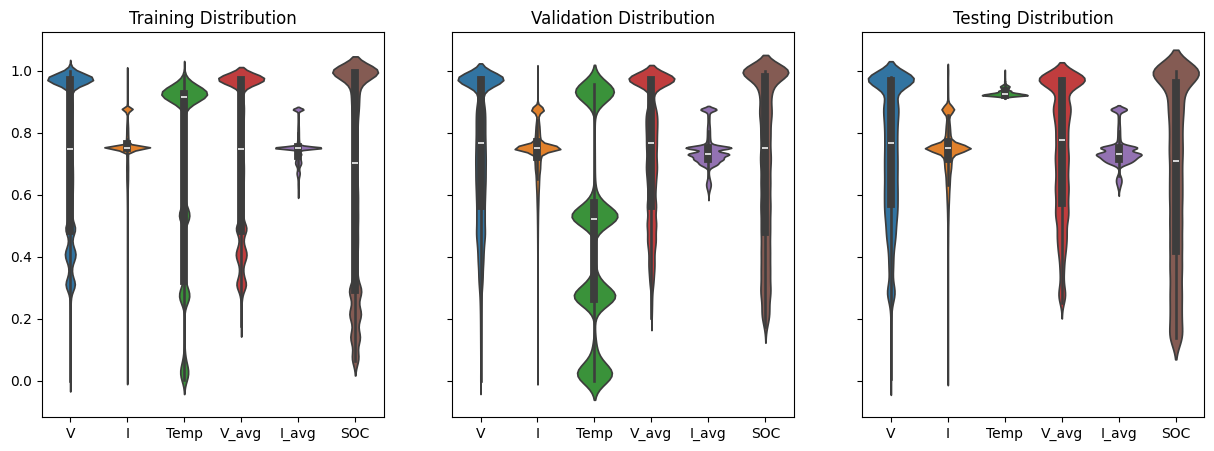

In [17]:
utils.violin_plot(
    train_data_df=train_data_df, 
    val_data_df=val_data_df, 
    test_data_df=test_data_df
)

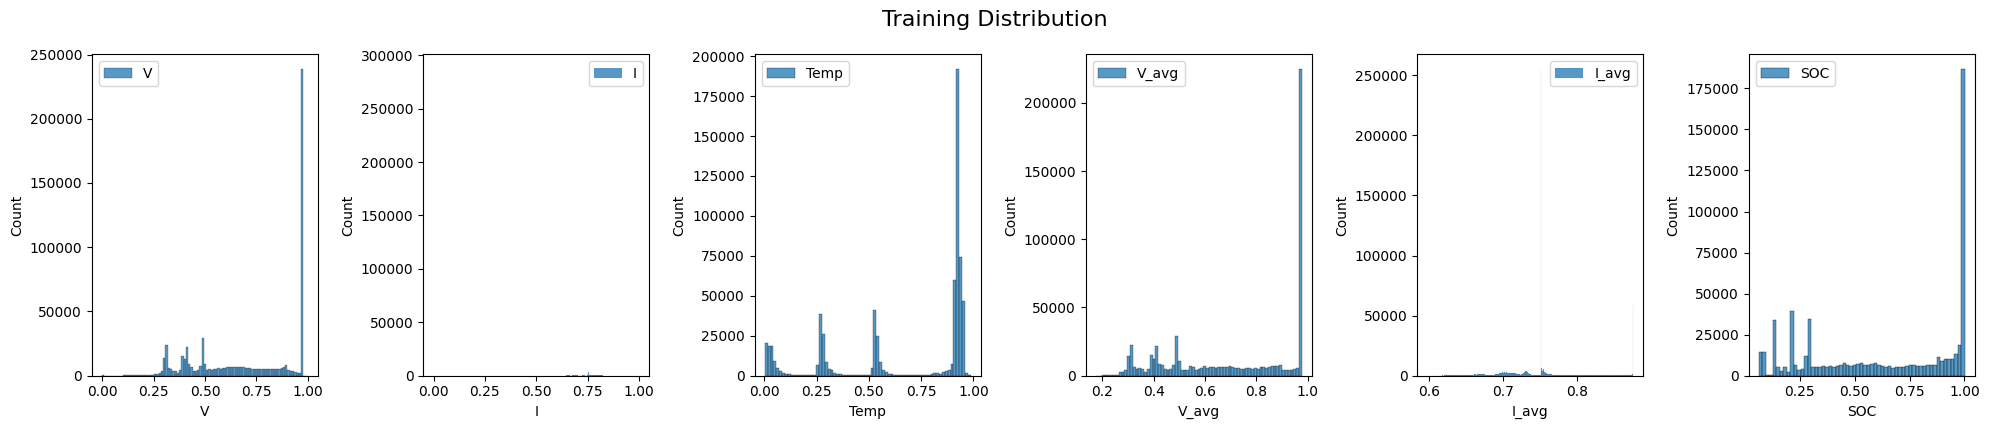

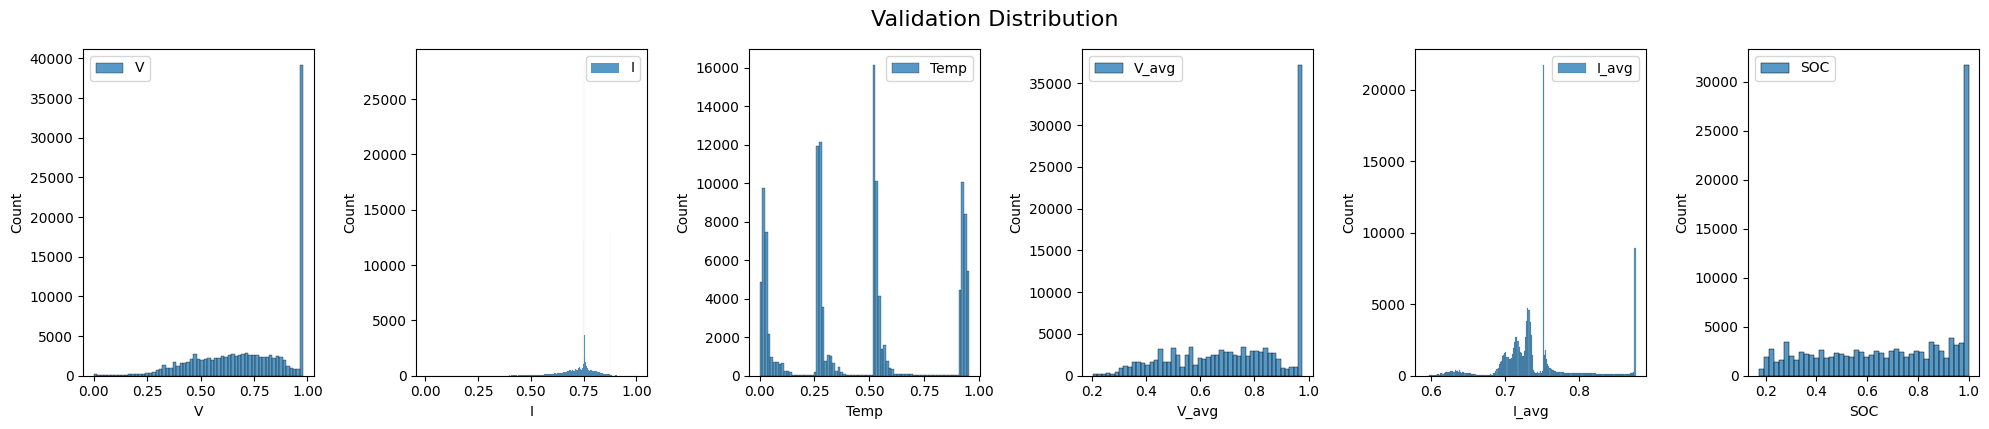

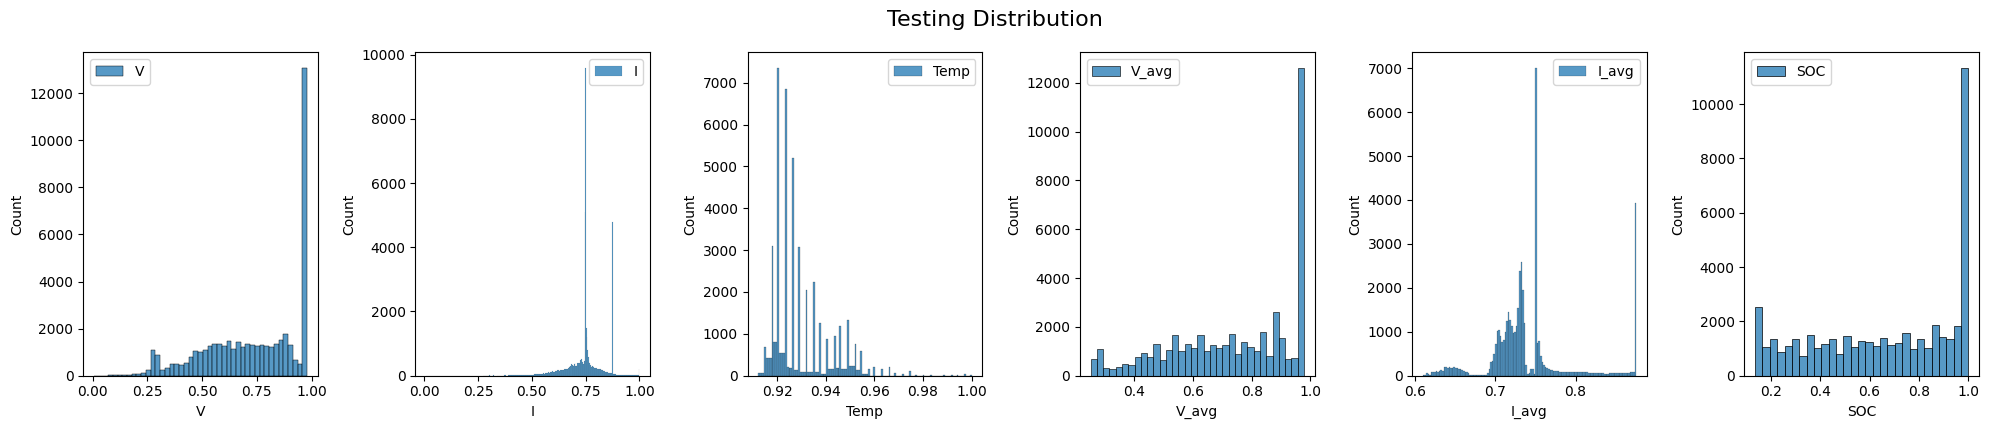

In [18]:
utils.hist_plot(
    train_data_df=train_data_df, 
    val_data_df=val_data_df, 
    test_data_df=test_data_df
)

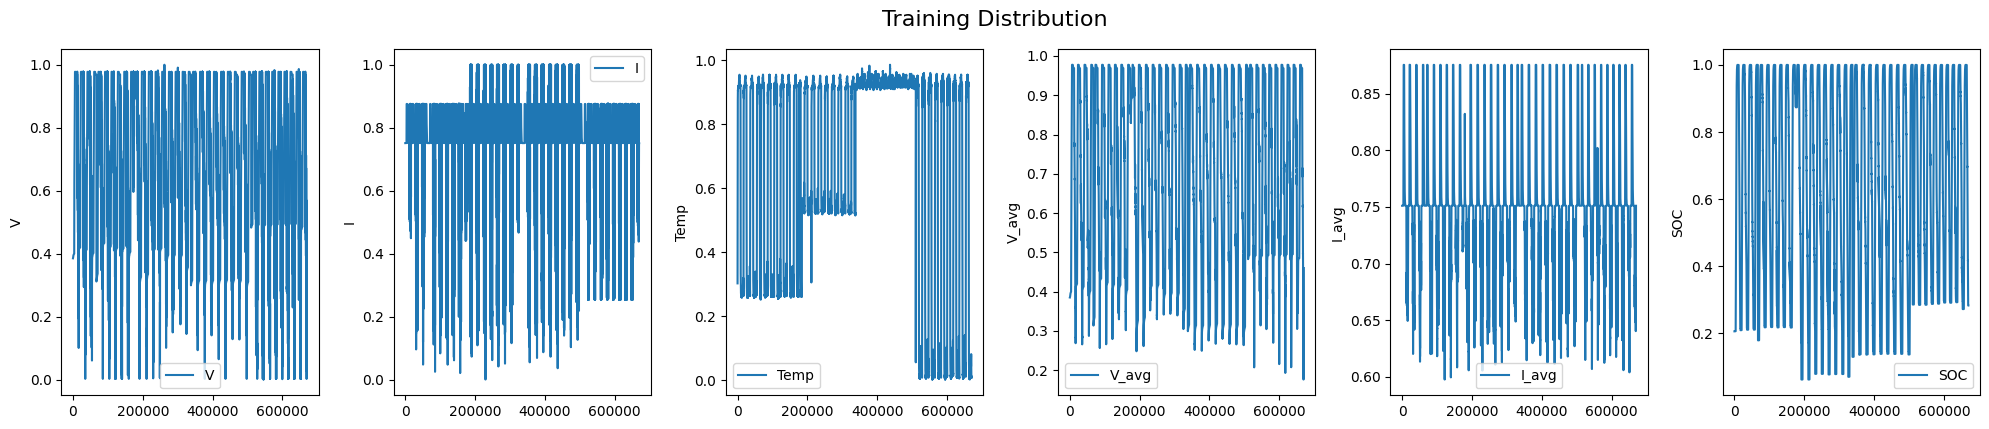

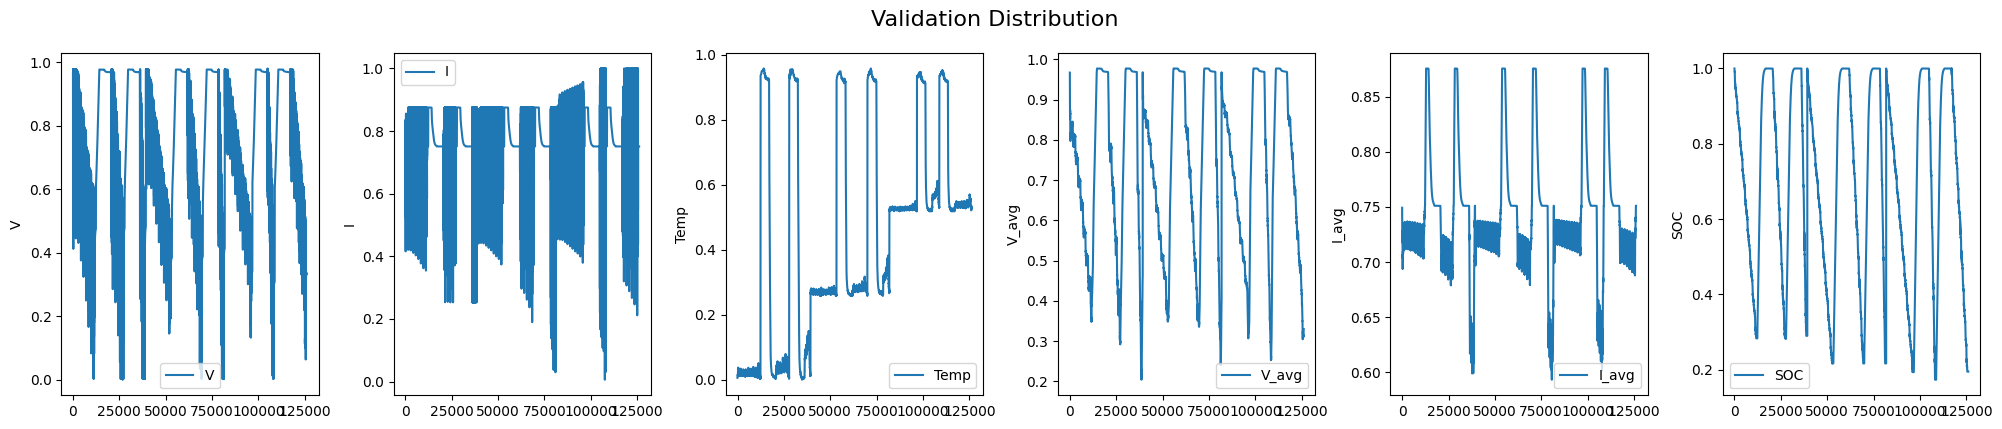

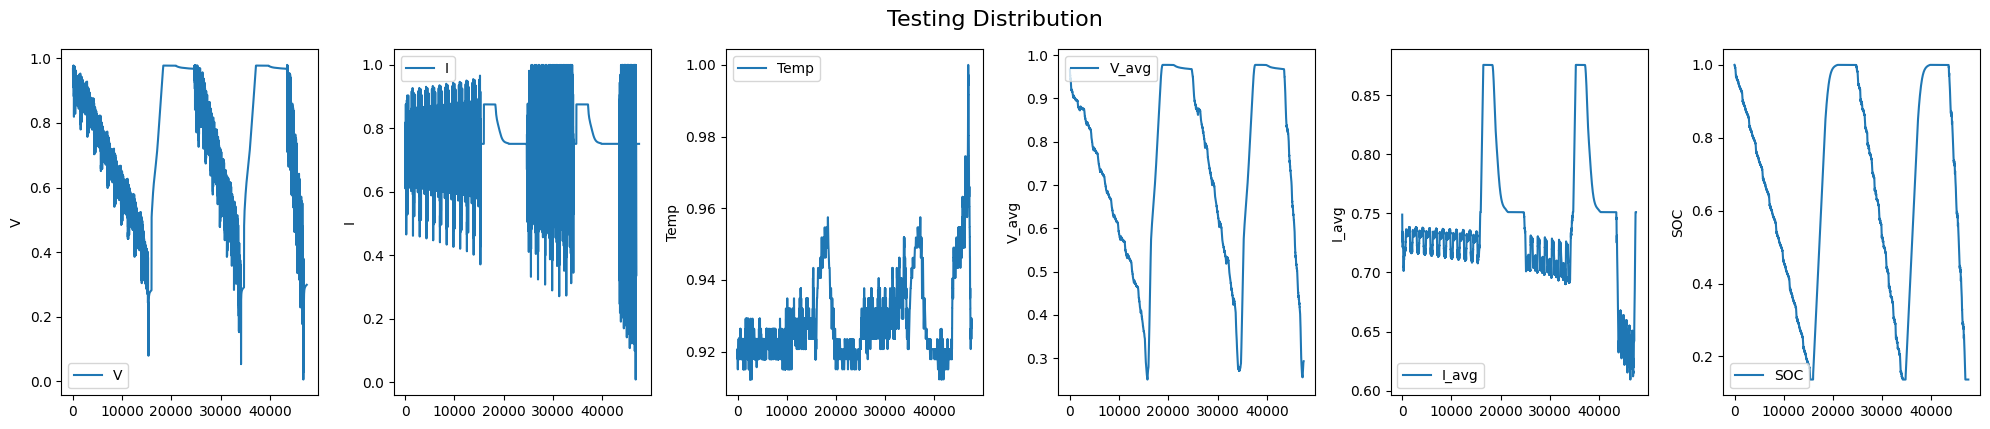

In [19]:
utils.time_series_plot(
    train_data_df=train_data_df, 
    val_data_df=val_data_df, 
    test_data_df=test_data_df
)

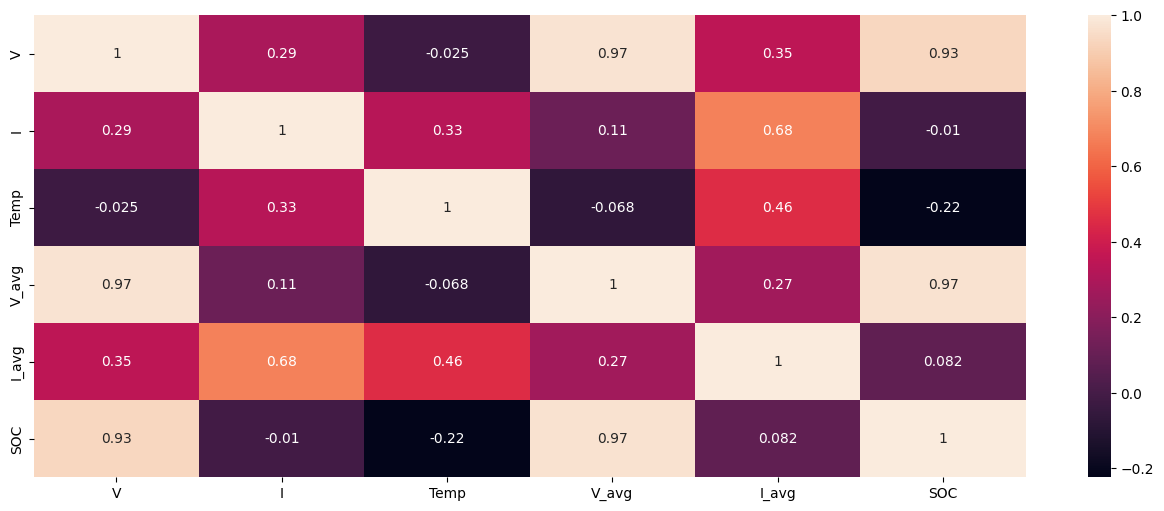

In [20]:
utils.correlation_map(data_df=train_data_df)

In [7]:
from tensorflow import keras
from tensorflow.keras import layers
import custom

In [28]:
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(
        256,
        activation=keras.activations.relu
    ),
    layers.Dense(
        256,
        activation=keras.activations.relu
    ),
    layers.Dense(
        128,
        activation=custom.CustomLeakyReLU(negative_slope=0.3)
    ),
    layers.Dense(
        y_train.shape[1],
        activation=custom.CustomClippedReLU()
    )
])

In [29]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9,
    staircase=False
)

optimizer = keras.optimizers.SGD(
    learning_rate=lr_schedule
)

In [30]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=10
)

In [31]:
model.compile(
    optimizer=optimizer,
    loss='mse'
)

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 256)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 100,353 (392.00 KB)

 Trainable params: 100,353 (392.00 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
kalman_filter = custom.KalmanFilter1D(
    process_variance=1e-5,
    measurement_variance=0.1**2, 
    initial_estimate=0, 
    initial_estimate_variance=1
)

In [34]:
history = model.fit(
    x=X_train,
    y=y_train,
    epochs=100,
    batch_size=64,
    validation_data=(
        X_val, 
        y_val
    ),
    callbacks = [
        early_stopping
    ],
    verbose=1,
)

Epoch 1/100
10469/10469 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.0652 - val_loss: 0.0036
Epoch 2/100
10469/10469 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.0026 - val_loss: 0.0033
Epoch 3/100
10469/10469 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.0023 - val_loss: 0.0031
Epoch 4/100
10469/10469 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.0021 - val_loss: 0.0030
Epoch 5/100
10469/10469 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.0020 - val_loss: 0.0029
Epoch 6/100
10469/10469 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - loss: 0.0020 - val_loss: 0.0029
Epoch 7/100
10469/10469 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.0019 - val_loss: 0.0028
Epoch 8/100
10469/10469 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.0019 - val_loss: 0.0028
Epoch 9/100
10469/10469 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.0019 - val_loss: 0.0029
Epoch 10/100
10469/10469 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.0019 - val_loss: 0.0027
Epoch 11/100
10469/10469 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.0019 - val

In [39]:
saved_model_name = 'fnn_model.keras'
models_dir = './models'
saved_model_path = os.path.join(models_dir, saved_model_name)
model.save(saved_model_path)

In [42]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
35,0.001781,0.002600,35
36,0.001780,0.002592,36
37,0.001780,0.002603,37
38,0.001780,0.002601,38
39,0.001779,0.002594,39


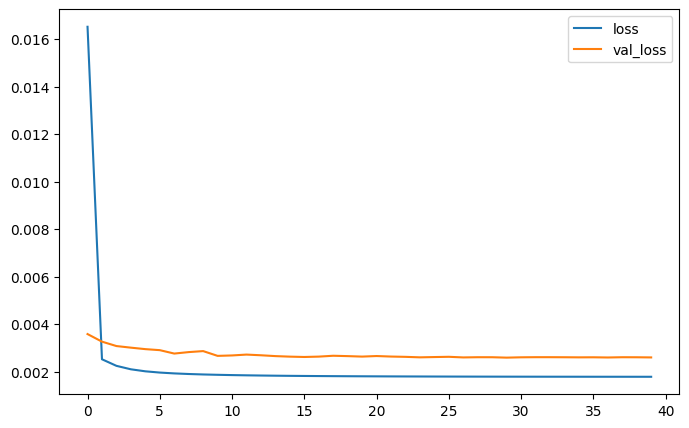

In [43]:
from matplotlib import pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show() 

In [9]:
saved_model_name = 'fnn_model.keras'
models_dir = './models'
saved_model_path = os.path.join(models_dir, saved_model_name)
model = keras.models.load_model(
    saved_model_path, 
    custom_objects={
        'CustomLeakyReLU': custom.CustomLeakyReLU,
        'CustomClippedReLU': custom.CustomClippedReLU
    }
)

In [14]:
y_predicted = kalman_filter.apply(
    measurements=model.predict(X_test)
)

1485/1485 ━━━━━━━━━━━━━━━━━━━━ 1s 804us/step


In [15]:
results = model.evaluate(X_test, y_test)

1485/1485 ━━━━━━━━━━━━━━━━━━━━ 1s 735us/step - loss: 8.0786e-04


In [17]:
metrics = utils.get_metrics(y_test, y_predicted)
metrics

,Metric,Value
0,max_error,0.826576
1,mean_absolute_error,0.019123
2,mean_absolute_percentage_error,0.053812
3,mean_squared_error,0.001103
4,root_mean_squared_error,0.033209
5,root_mean_squared_log_error,0.023303


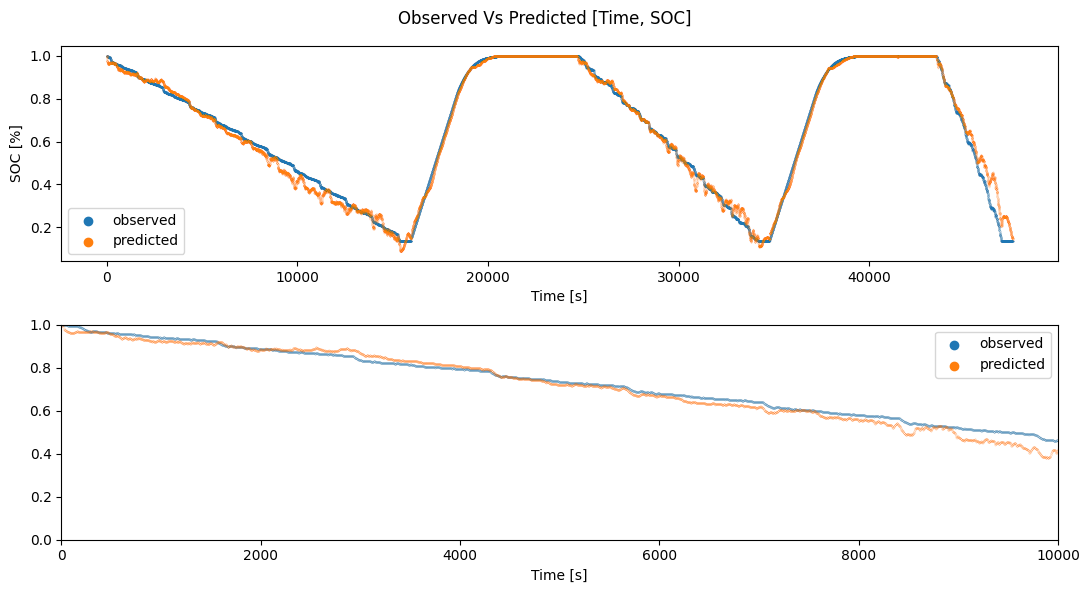

In [13]:
utils.results_plot(
    x_observed=np.arange(0, len(y_test), 1), 
    y_observed=y_test, 
    x_predicted=np.arange(0, len(y_predicted), 1), 
    y_predicted=y_predicted,
    xlim=[0,10000],
    ylim=[0,1],
    xlabel='Time [s]', 
    ylabel='SOC [%]', 
    title='Observed Vs Predicted [Time, SOC]'
)

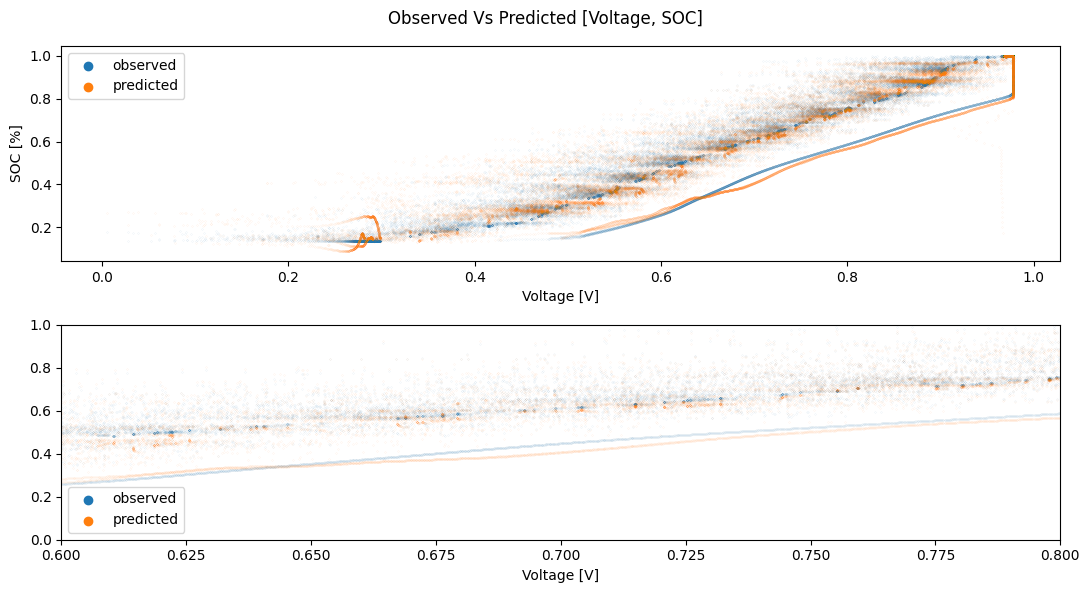

In [18]:
utils.results_plot(
    x_observed=test_data_df['V'], 
    y_observed=y_test, 
    x_predicted=test_data_df['V'], 
    y_predicted=y_predicted,
    xlim=[0.6,0.8],
    ylim=[0,1],
    xlabel='Voltage [V]', 
    ylabel='SOC [%]', 
    title='Observed Vs Predicted [Voltage, SOC]'
)

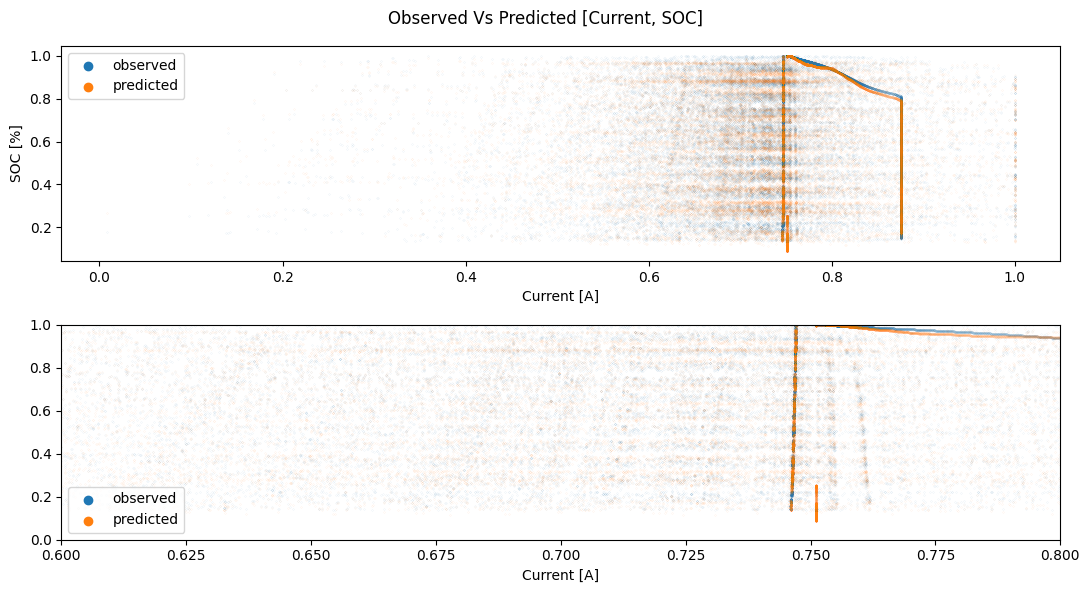

In [19]:
utils.results_plot(
    x_observed=test_data_df['I'], 
    y_observed=y_test, 
    x_predicted=test_data_df['I'], 
    y_predicted=y_predicted,
    xlim=[0.6,0.8],
    ylim=[0,1], 
    xlabel='Current [A]', 
    ylabel='SOC [%]', 
    title='Observed Vs Predicted [Current, SOC]'
)

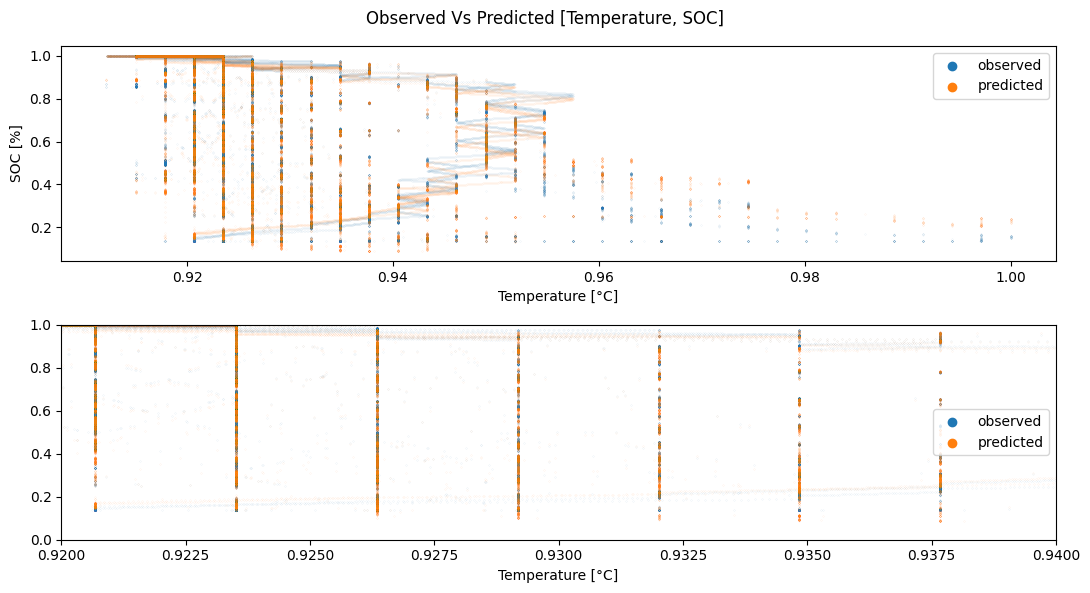

In [20]:
utils.results_plot(
    x_observed=test_data_df['Temp'], 
    y_observed=y_test, 
    x_predicted=test_data_df['Temp'], 
    y_predicted=y_predicted, 
    xlim=[0.92,0.94],
    ylim=[0,1],
    xlabel='Temperature [°C]', 
    ylabel='SOC [%]', 
    title='Observed Vs Predicted [Temperature, SOC]'
)

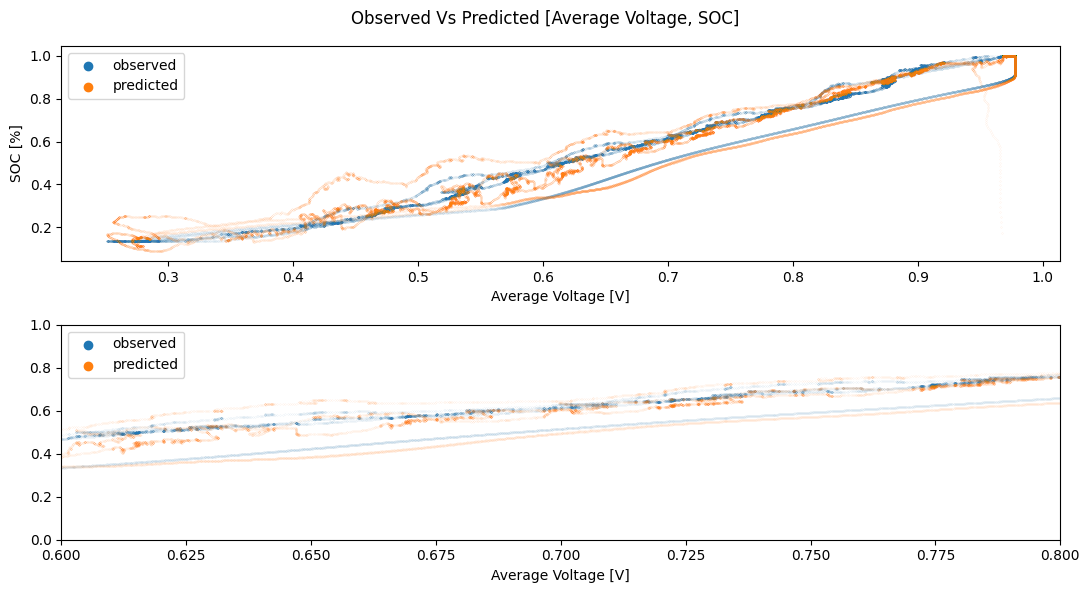

In [21]:
utils.results_plot(
    x_observed=test_data_df['V_avg'], 
    y_observed=y_test, 
    x_predicted=test_data_df['V_avg'], 
    y_predicted=y_predicted,
    xlim=[0.6,0.8],
    ylim=[0,1], 
    xlabel='Average Voltage [V]', 
    ylabel='SOC [%]', 
    title='Observed Vs Predicted [Average Voltage, SOC]'
)

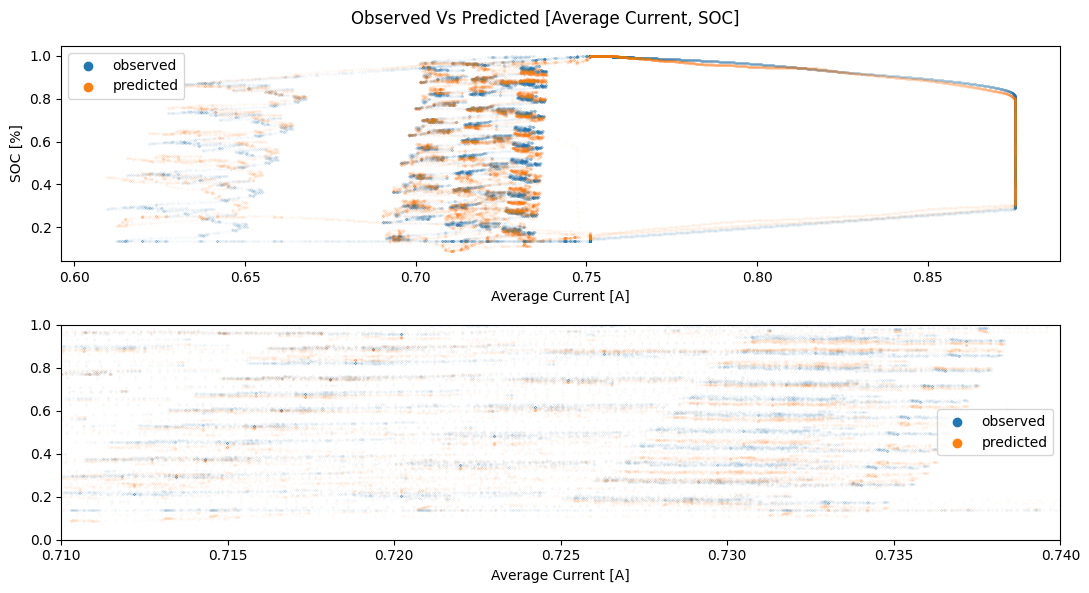

In [22]:
utils.results_plot(
    x_observed=test_data_df['I_avg'], 
    y_observed=y_test, 
    x_predicted=test_data_df['I_avg'], 
    y_predicted=y_predicted,
    xlim=[0.71,0.74],
    ylim=[0,1], 
    xlabel='Average Current [A]', 
    ylabel='SOC [%]', 
    title='Observed Vs Predicted [Average Current, SOC]'
)

In [23]:
import pickle

In [19]:
from sklearn import linear_model

lregression_model = linear_model.LinearRegression()
lregression_model.fit(
    X=X_train,
    y=y_train
)

LinearRegression()

In [22]:
lregression_model_path = './models/lregression_model.sav'
pickle.dump(lregression_model, open(lregression_model_path, 'wb'))

In [25]:
lregression_model_path = './models/lregression_model.sav'
lregression_model = pickle.load(open(lregression_model_path, 'rb'))

In [27]:
y_predicted = kalman_filter.apply(
    measurements=lregression_model.predict(X_test)
)

In [28]:
result = lregression_model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 86.04%


In [29]:
lregression_metrics = utils.get_metrics(y_test, y_predicted)
lregression_metrics

,Metric,Value
0,max_error,0.747779
1,mean_absolute_error,0.086543
2,mean_absolute_percentage_error,0.190059
3,mean_squared_error,0.011394
4,root_mean_squared_error,0.106745
5,root_mean_squared_log_error,0.071624


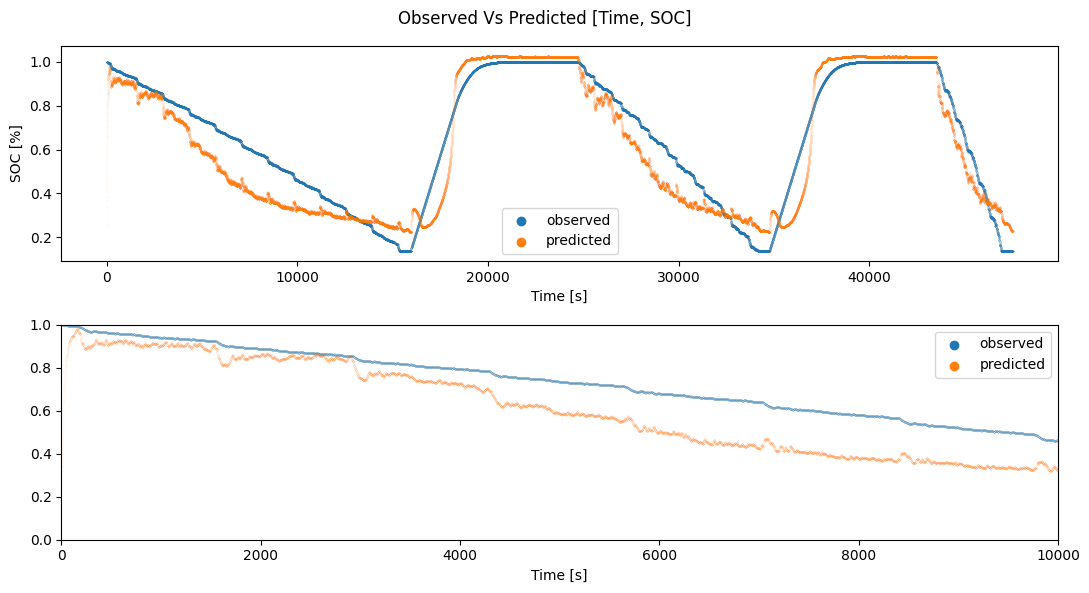

In [30]:
utils.results_plot(
    x_observed=np.arange(0, len(y_test), 1), 
    y_observed=y_test, 
    x_predicted=np.arange(0, len(y_predicted), 1), 
    y_predicted=y_predicted,
    xlim=[0,10000],
    ylim=[0,1],
    xlabel='Time [s]', 
    ylabel='SOC [%]', 
    title='Observed Vs Predicted [Time, SOC]'
)

In [28]:
from sklearn import tree

decisiontree_model = tree.DecisionTreeRegressor()
decisiontree_model.fit(
    X=X_train, 
    y=y_train
)

DecisionTreeRegressor()

In [29]:
decisiontree_model_path = './models/decisiontree_model.sav'
pickle.dump(decisiontree_model, open(decisiontree_model_path, 'wb'))

In [31]:
decisiontree_model_path = './models/decisiontree_model.sav'
decisiontree_model = pickle.load(open(decisiontree_model_path, 'rb'))

In [33]:
y_predicted = kalman_filter.apply(
    measurements=decisiontree_model.predict(X_test)
)

In [34]:
result = decisiontree_model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 97.93%


In [35]:
decisiontree_metrics = utils.get_metrics(y_test, y_predicted)
decisiontree_metrics

,Metric,Value
0,max_error,0.827647
1,mean_absolute_error,0.018220
2,mean_absolute_percentage_error,0.051352
3,mean_squared_error,0.001073
4,root_mean_squared_error,0.032763
5,root_mean_squared_log_error,0.023211


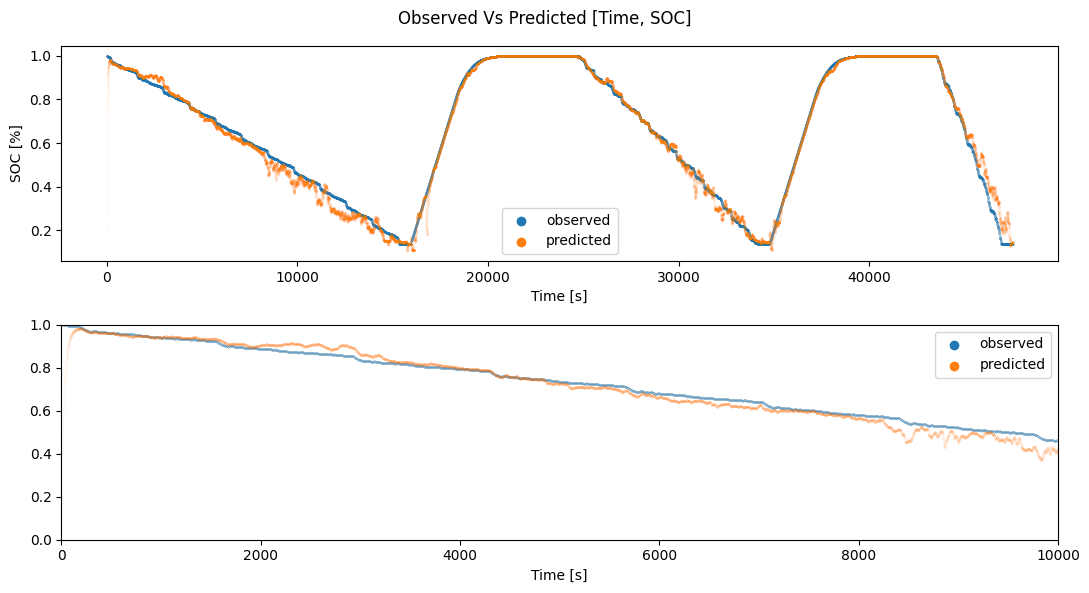

In [36]:
utils.results_plot(
    x_observed=np.arange(0, len(y_test), 1), 
    y_observed=y_test, 
    x_predicted=np.arange(0, len(y_predicted), 1), 
    y_predicted=y_predicted,
    xlim=[0,10000],
    ylim=[0,1],
    xlabel='Time [s]', 
    ylabel='SOC [%]', 
    title='Observed Vs Predicted [Time, SOC]'
)

In [36]:
from sklearn import neighbors

n_neighbors = 5

nnregression_model = neighbors.KNeighborsRegressor(n_neighbors)
nnregression_model.fit(
    X=X_train, 
    y=y_train
)

KNeighborsRegressor()

In [37]:
nnregression_model_path = './models/nnregression_model.sav'
pickle.dump(nnregression_model, open(nnregression_model_path, 'wb'))

In [37]:
nnregression_model_path = './models/nnregression_model.sav'
nnregression_model = pickle.load(open(nnregression_model_path, 'rb'))

In [38]:
y_predicted = kalman_filter.apply(
    measurements=nnregression_model.predict(X_test)
)

In [39]:
result = nnregression_model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 98.78%


In [40]:
nnregression_metrics = utils.get_metrics(y_test, y_predicted)
nnregression_metrics

,Metric,Value
0,max_error,0.827647
1,mean_absolute_error,0.016426
2,mean_absolute_percentage_error,0.045613
3,mean_squared_error,0.000926
4,root_mean_squared_error,0.030424
5,root_mean_squared_log_error,0.021342


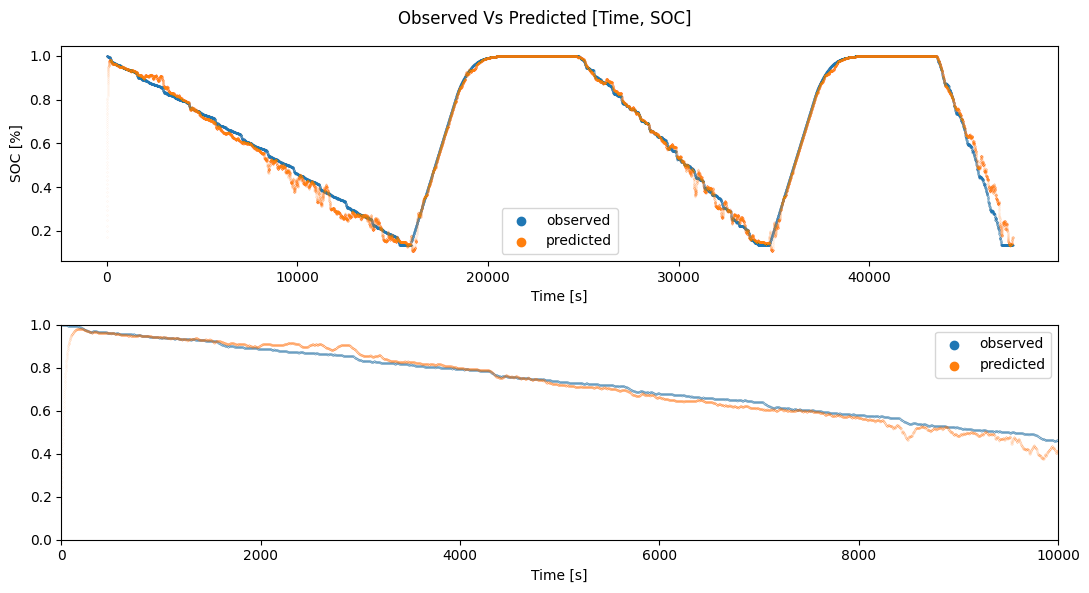

In [41]:
utils.results_plot(
    x_observed=np.arange(0, len(y_test), 1), 
    y_observed=y_test, 
    x_predicted=np.arange(0, len(y_predicted), 1), 
    y_predicted=y_predicted,
    xlim=[0,10000],
    ylim=[0,1],
    xlabel='Time [s]', 
    ylabel='SOC [%]', 
    title='Observed Vs Predicted [Time, SOC]'
)